# Question - 1

## The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Flatten, Dense 
%matplotlib inline
import warnings

In [2]:
forestfires = pd.read_csv(r"C:\Users\Madhu\Downloads\forestfires (2).csv")

In [3]:
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
forestfires.head()
            

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
forestfires.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


## EDA

In [6]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
forestfires.shape

(517, 31)

In [9]:
forestfires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
forestfires.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [11]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### Handling DAuplicate records

In [12]:
forestfires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

## Handling Duplicate records

In [13]:
# check for duplicate data
duplicate = forestfires.duplicated()
print(duplicate.sum())
forestfires[duplicate]

8


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
forestfires.drop_duplicates()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## VISUALIZING 

## VISUALIZING BY BOXPLOT

<AxesSubplot:xlabel='size_category', ylabel='count'>

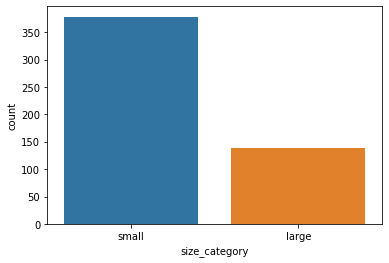

In [15]:
sns.countplot(x='size_category',data =forestfires)

Text(0, 0.5, 'temp')

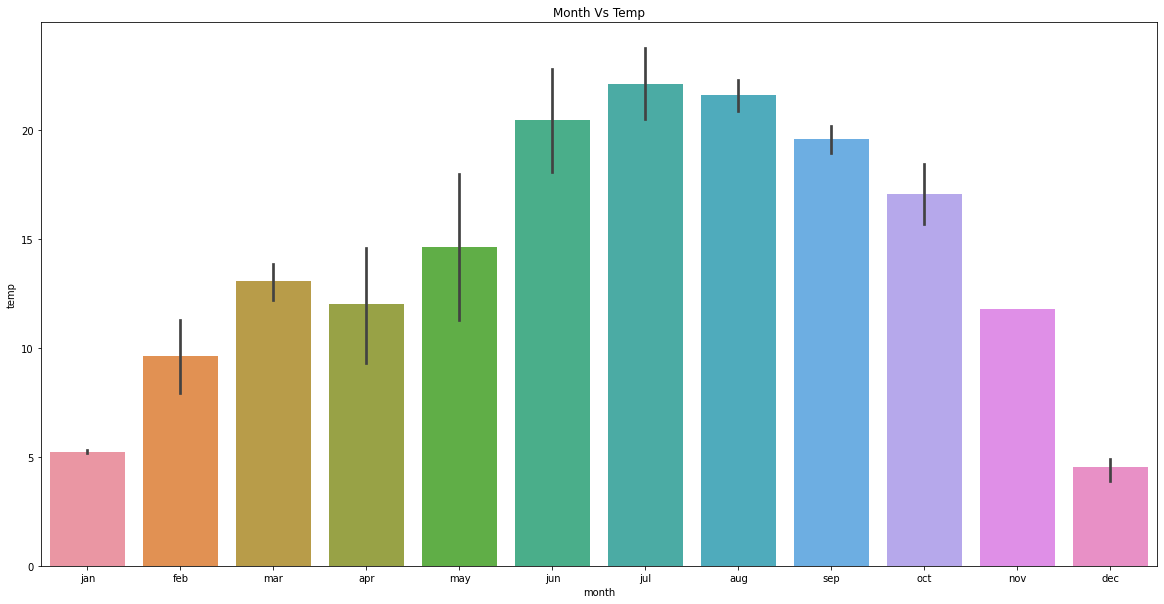

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x='month',y='temp',data=forestfires,
            order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Month Vs Temp')
plt.xlabel('month')
plt.ylabel('temp')

Text(0.5, 1.0, 'Countplot for weekdays')

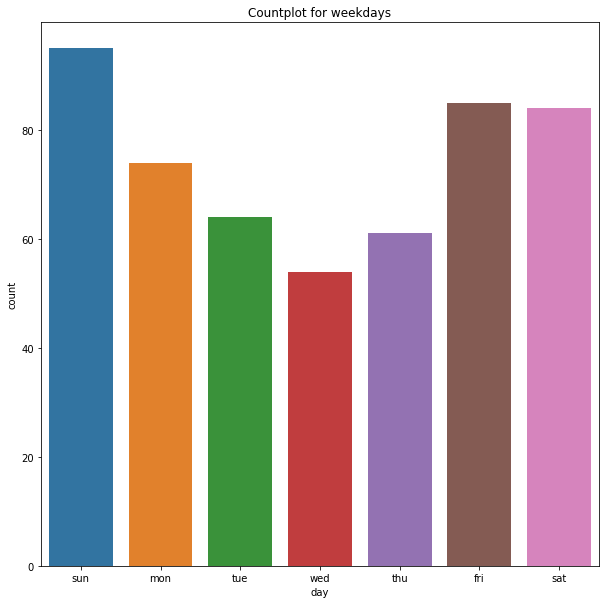

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x='day',data=forestfires,
              order=['sun','mon','tue','wed','thu','fri','sat'])
plt.title('Countplot for weekdays')

<AxesSubplot:>

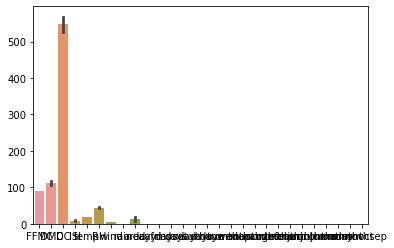

In [18]:
import seaborn as sns
sns.barplot(data=forestfires)

<AxesSubplot:>

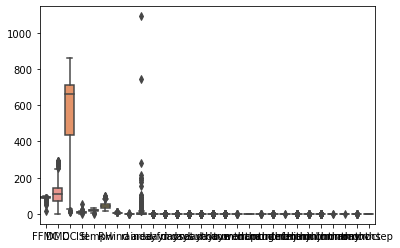

In [19]:

sns.boxplot(data=forestfires)

(array([[517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [268., 209.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 86.,   3.,  15.,  25.,  27.,  91., 219.,  51.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,

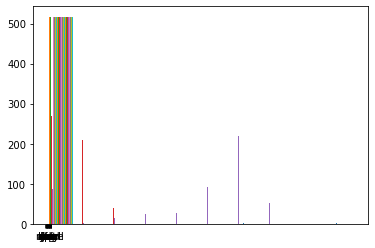

In [20]:
plt.hist(forestfires)

(array([378.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

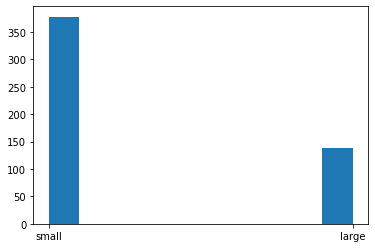

In [21]:
plt.hist(forestfires['size_category'])


(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

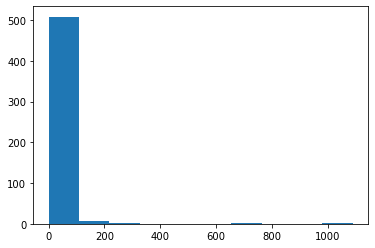

In [22]:
plt.hist(forestfires['area'])

(array([ 14.,  45.,  97.,  93.,  92., 113.,  19.,  26.,   5.,  13.]),
 array([0.4, 1.3, 2.2, 3.1, 4. , 4.9, 5.8, 6.7, 7.6, 8.5, 9.4]),
 <BarContainer object of 10 artists>)

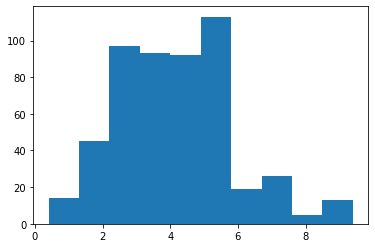

In [23]:
plt.hist(forestfires['wind'])

(array([ 18.,  11.,  31.,  47.,  92., 127.,  99.,  55.,  24.,  13.]),
 array([ 2.2 ,  5.31,  8.42, 11.53, 14.64, 17.75, 20.86, 23.97, 27.08,
        30.19, 33.3 ]),
 <BarContainer object of 10 artists>)

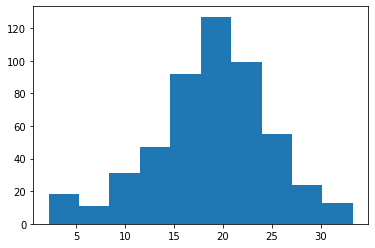

In [24]:
plt.hist(forestfires['temp'])

#### Data Preprocessing

In [25]:
#Dropping columns which are not required
forestfires_data=forestfires.drop(columns=['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr',	
                               'monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar',
                               'monthmay','monthnov','monthoct','monthsep'],axis=1)

In [26]:
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


Text(0.5, 1.0, 'HeatMap of Features for the Classes')

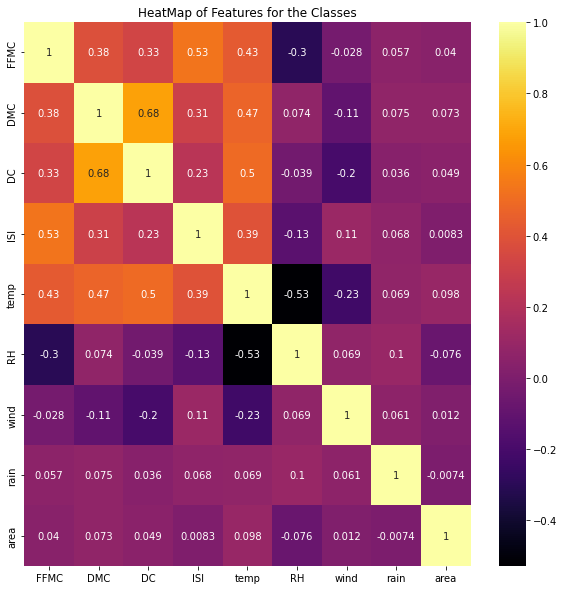

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(forestfires_data.corr(),annot=True,cmap="inferno")
plt.title("HeatMap of Features for the Classes")

In [28]:
forestfires_data["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [29]:
month_data={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
forestfires_data.replace(month_data,inplace=True)
day_data={'day':{'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}}
forestfires_data.replace(day_data,inplace=True)
forestfires_data['size_category'].unique()
forestfires_data.size_category.replace(('small','large'),(1,0),inplace=True)


In [30]:
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [31]:
X=forestfires_data.iloc[:,0:11]
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [32]:
Y=forestfires_data["size_category"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_scaled

array([[-1.96844301,  0.35772091, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 1.1101202 , -1.09090867, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 1.1101202 ,  0.84059743, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [ 0.23053071,  1.32347396, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.23053071,  0.84059743,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 1.54991494, -1.09090867, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [34]:
scaled_forestfires_data=pd.DataFrame(x_scaled,columns=X.columns)
scaled_forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [35]:
X_transformed=scaled_forestfires_data
X_transformed

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [36]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

## model building

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X_transformed,Y,test_size=0.20,random_state=123)

## model training

In [38]:
model=Sequential()
model.add(Dense(units=12,input_dim=11,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
model.fit(X_train,Y_train, epochs=100, batch_size=10)

Epoch 1/100
42/42 [==============================] - 1s 4ms/step - loss: 0.6875 - accuracy: 0.7288
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.7361
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 0.6367 - accuracy: 0.7361
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.5918 - accuracy: 0.7361
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.7385
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 0.5164 - accuracy: 0.7482
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 0.4857 - accuracy: 0.7724
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7918
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 0.4103 - accuracy: 0.8232
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.8475
Epoch 11/

Epoch 83/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 84/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9976
Epoch 85/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9976
Epoch 86/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 1.0000
Epoch 87/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9976
Epoch 88/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 89/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 90/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 0.9976
Epoch 91/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 92/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9976


## model evaluation

In [41]:
scores = model.evaluate(X_test,Y_test)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

4/4 [==============================] - 0s 5ms/step - loss: 0.0720 - accuracy: 0.9615
accuracy: 96.15%


## Gas Turbine

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
gt = pd.read_csv(r"C:\Users\Madhu\Downloads\gas_turbines (1).csv")

In [44]:
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [45]:
gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# EDA

In [46]:
gt.shape

(15039, 11)

In [47]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [48]:
gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [49]:
gt.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [50]:
gt.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [51]:
gt['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [52]:
len(gt['TEY'].unique())

4207

## headline missing values

In [53]:
gt.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### Handling Duplicate records 

In [54]:
# check for duplicate data
duplicate = gt.duplicated()
print(duplicate.sum())
gt[duplicate]

0


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


## Plots and Visualizations

#### VISUALIZING BY BOXPLOT

AT


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


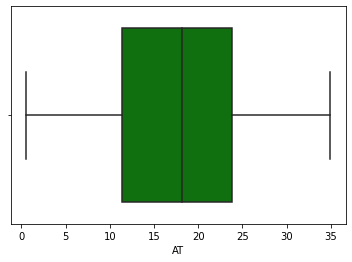

AP


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


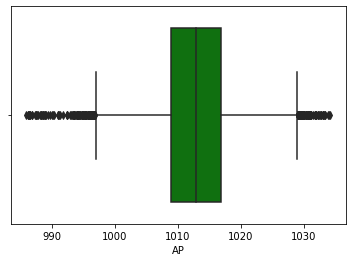

AH


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


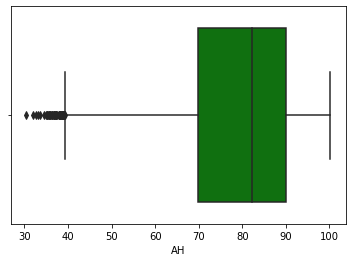

C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AFDP


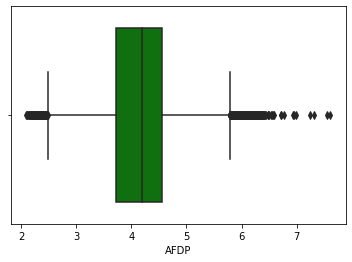

GTEP


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


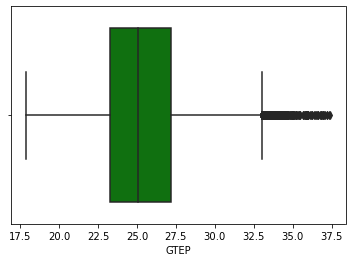

TIT


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


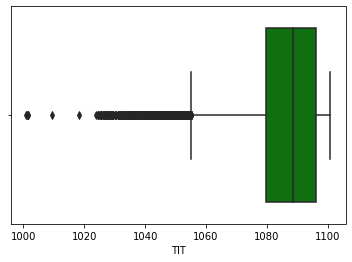

TAT


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


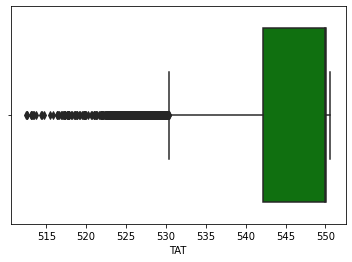

TEY


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


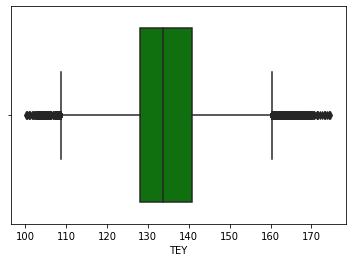

C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


CDP


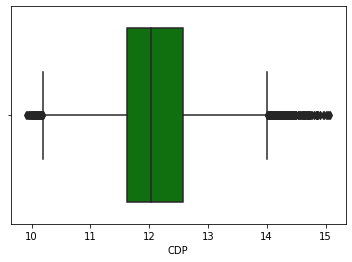

CO


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


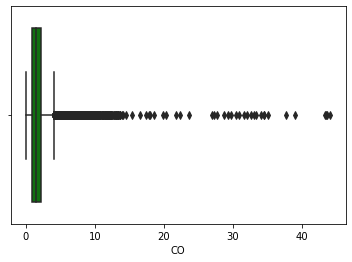

NOX


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


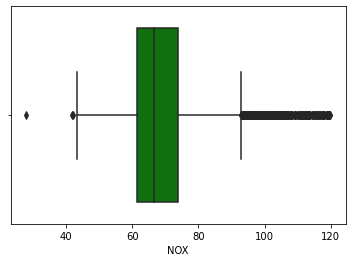

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

for i in gt.columns:
    print(i)
    sns.boxplot(gt[i],color = 'green')
    plt.show()


#### Inferences: About Skewness

    AH,TIT,TAT are left Skewed(negative-skewness)
    
    CO are Right Skewed (positive-skewness)
    
    AT,AP,NOX are normally distributed
    

{'whiskers': [<matplotlib.lines.Line2D at 0x255082878e0>,
 'caps': [<matplotlib.lines.Line2D at 0x25508287e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x255082875e0>],
 'medians': [<matplotlib.lines.Line2D at 0x25508296460>],
 'fliers': [<matplotlib.lines.Line2D at 0x25508296730>],
 'means': []}

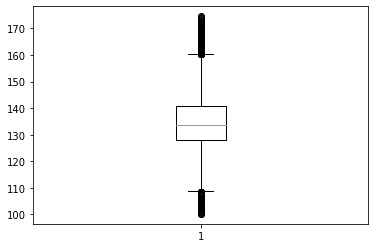

In [56]:
# Boxplot of Turbine Energy Yield (TEY)
plt.boxplot(gt['TEY'])

C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY'>

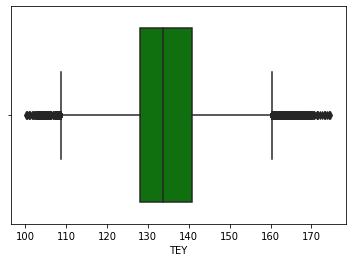

In [57]:
sns.boxplot(gt['TEY'], color = 'green')

In [58]:
#sns.set(rc={'figure.figsize': (20,20)})
#sns.boxplot(x="variable",y="value", data=pd.melt(gt))

### Independent and Dependent variable

In [59]:
X = gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gt.loc[:,['TEY']]

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [61]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [62]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\Madhu\AppData\Local\Temp\ipykernel_17404\2589631937.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.20 (0.24) MSE


In [63]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-1.399433 , -1.3952173, -1.403816 , ..., -1.4800423, -1.3734652,
       -1.3113619], dtype=float32)

##### Train-Test Split Model Validation Technique

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [65]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [66]:
prediction

array([-1.680659  , -0.05300326, -0.11137885, ..., -0.5075361 ,
       -0.9837663 ,  0.62711966], dtype=float32)

In [67]:
X = gt.drop(columns = ['TEY'], axis = 1) 
y = gt.iloc[:,7]

In [68]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [69]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [70]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [71]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 3s - loss: 3004.4644 - mean_squared_error: 3004.4644 - val_loss: 204.4667 - val_mean_squared_error: 204.4667 - 3s/epoch - 8ms/step
Epoch 2/100
381/381 - 2s - loss: 103.4687 - mean_squared_error: 103.4687 - val_loss: 77.5645 - val_mean_squared_error: 77.5645 - 2s/epoch - 5ms/step
Epoch 3/100
381/381 - 2s - loss: 44.0801 - mean_squared_error: 44.0801 - val_loss: 37.2678 - val_mean_squared_error: 37.2678 - 2s/epoch - 5ms/step
Epoch 4/100
381/381 - 2s - loss: 22.9971 - mean_squared_error: 22.9971 - val_loss: 19.1187 - val_mean_squared_error: 19.1187 - 2s/epoch - 5ms/step
Epoch 5/100
381/381 - 2s - loss: 12.7375 - mean_squared_error: 12.7375 - val_loss: 14.1555 - val_mean_squared_error: 14.1555 - 2s/epoch - 5ms/step
Epoch 6/100
381/381 - 2s - loss: 7.0919 - mean_squared_error: 7.0919 - val_loss: 6.2213 - val_mean_squared_error: 6.2213 - 2s/epoch - 5ms/step
Epoch 7/100
381/381 - 2s - loss: 4.2254 - mean_squared_error: 4.2254 - val_loss: 3.9513 - val_mean_squared_error: 

In [72]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 0.7746 - mean_squared_error: 0.7746


In [73]:
predictions = model.predict_on_batch(X_test_scaled)

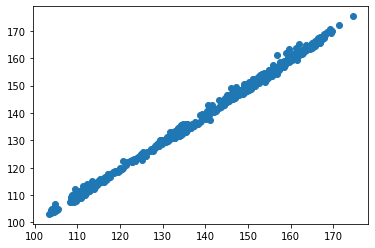

In [74]:
plt.scatter(y_test, predictions)

In [75]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.112686,0.258303
1,111.88,111.745041,0.120628
2,133.72,133.765060,0.033698
3,133.79,133.875427,0.063852
4,110.77,110.240700,0.477837
...,...,...,...
1499,132.85,132.878204,0.021230
1500,125.07,122.795769,1.818367
1501,160.95,160.778427,0.106600
1502,133.12,132.267639,0.640295


## Results:
    
    Here we got the information about skweness and normally distributed using Boxplot of given dataset.
    
    By using TensorFlow, Prediction of Turbine Energy Yield (TEY) we can see error is going to decrease it means we got
    better model.